<a href="https://colab.research.google.com/github/Maryam25519/Mec-registeration-system-/blob/main/pizza_and_icecream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/pizza and ice cream dataset/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/pizza and ice cream dataset/test'    # Update with your actual path

In [4]:
import os

# Training set
print("Training set:")
print("Pizza images:", len(os.listdir('/content/drive/MyDrive/pizza_icecream/train/pizza')))
print("Ice Cream images:", len(os.listdir('/content/drive/MyDrive/pizza_icecream/train/icecream')))

# Test set
print("\nTest set:")
print("Pizza images:", len(os.listdir('/content/drive/MyDrive/pizza_icecream/test/pizza')))
print("Ice Cream images:", len(os.listdir('/content/drive/MyDrive/pizza_icecream/test/icecream')))


Training set:
Pizza images: 327
Ice Cream images: 391

Test set:
Pizza images: 47
Ice Cream images: 59


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the training dataset
train_dir = '/content/drive/MyDrive/pizza_icecream/train'  # Ensure the folder name has no space or is correctly typed

# Create ImageDataGenerator for training with 20% validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% will be used for validation
)

# Load and prepare training data (80%)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',   # For binary classification (pizza vs. icecream)
    subset='training'
)

# Load and prepare validation data (20%)
validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 575 images belonging to 2 classes.
Found 143 images belonging to 2 classes.


In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create CNN model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Second Convolutional Block
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Third Convolutional Block
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # Because it's binary classification (pizza vs. icecream)
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 197s 11s/step - accuracy: 0.5711 - loss: 0.7926 - val_accuracy: 0.7902 - val_loss: 0.4571
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.7768 - loss: 0.4421 - val_accuracy: 0.8392 - val_loss: 0.3516
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.8940 - loss: 0.2671 - val_accuracy: 0.6923 - val_loss: 0.5979
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.8489 - loss: 0.3481 - val_accuracy: 0.8881 - val_loss: 0.2772
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9186 - loss: 0.1850 - val_accuracy: 0.9021 - val_loss: 0.2771
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.9658 - loss: 0.1028 - val_accuracy: 0.9021 - val_loss: 0.3243
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9712 - loss: 0.0823 - val_accuracy: 0.8811 - val_loss: 0.3535
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.9864 - loss: 0.0482 - val_accuracy: 0.9091 - val_los

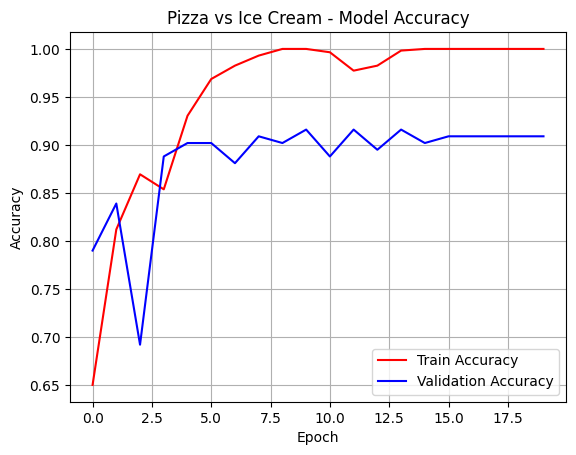

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Pizza vs Ice Cream - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


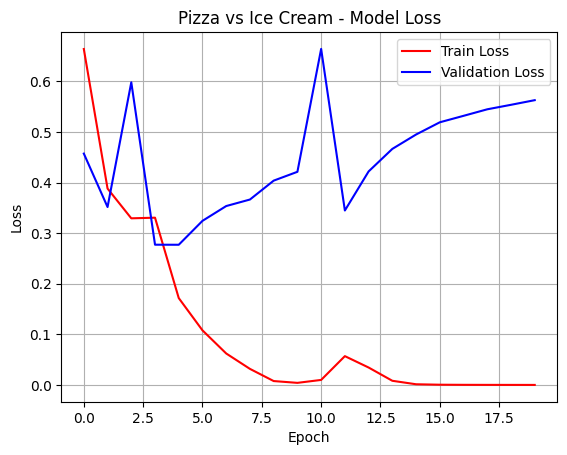

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='Train Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.title('Pizza vs Ice Cream - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


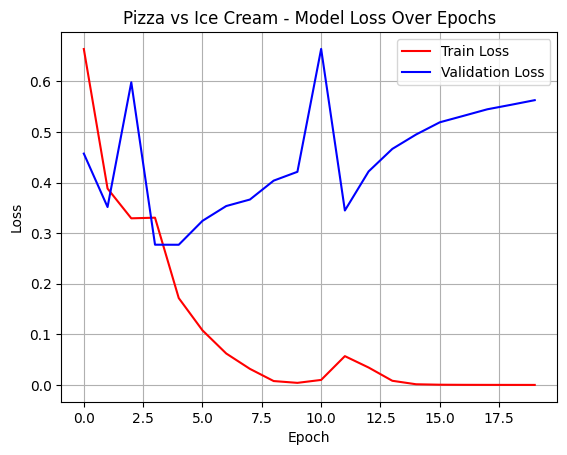

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='Train Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.title('Pizza vs Ice Cream - Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
test_dir = '/content/drive/MyDrive/pizza_icecream/test'


In [18]:
import os
print(os.listdir('/content/drive/MyDrive/pizza_icecream'))


['train', 'test']


In [19]:
print(os.listdir('/content/drive/MyDrive/pizza_icecream/test'))


['pizza', 'icecream']


In [20]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to test data
test_dir = '/content/drive/MyDrive/pizza_icecream/test'

# Rescale pixel values
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test images
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)


Found 106 images belonging to 2 classes.


In [23]:
#predict the test data
predictions = model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Step 1: Get true labels from test_data
true_labels = test_data.classes

# Step 2: Get predicted probabilities from the model
predictions = model.predict(test_data, verbose=1)

# Step 3: Convert probabilities to class labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Step 4: Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Step 5: Classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Pizza', 'Ice Cream']))


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 923ms/step
Confusion Matrix:
[[31 28]
 [25 22]]
Classification Report:
              precision    recall  f1-score   support

       Pizza       0.55      0.53      0.54        59
   Ice Cream       0.44      0.47      0.45        47

    accuracy                           0.50       106
   macro avg       0.50      0.50      0.50       106
weighted avg       0.50      0.50      0.50       106



In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Step 1: Get true labels from test_data
true_labels = test_data.classes

# Step 2: Predict probabilities for test data
predictions = model.predict(test_data, verbose=1)

# Step 3: Convert probabilities to binary class labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Step 4: Print confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Step 5: Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Pizza', 'Ice Cream']))


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 699ms/step
Confusion Matrix:
[[34 25]
 [22 25]]
Classification Report:
              precision    recall  f1-score   support

       Pizza       0.61      0.58      0.59        59
   Ice Cream       0.50      0.53      0.52        47

    accuracy                           0.56       106
   macro avg       0.55      0.55      0.55       106
weighted avg       0.56      0.56      0.56       106



In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Create CNN model
model = Sequential()

# Block 1
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())  # Normalize activations to reduce overfitting
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Block 2
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Block 3
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))  # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification: Pizza vs Ice Cream


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
from keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.6802 - loss: 5.6653 - val_accuracy: 0.5455 - val_loss: 5.2654
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.8552 - loss: 2.0244 - val_accuracy: 0.5455 - val_loss: 19.7309
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.8889 - loss: 1.8416 - val_accuracy: 0.5455 - val_loss: 35.5992
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step - accuracy: 0.9116 - loss: 1.7089 - val_accuracy: 0.5455 - val_loss: 46.7178
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.9217 - loss: 1.3817 - val_accuracy: 0.5455 - val_loss: 28.8464
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 5s/step - accuracy: 0.9348 - loss: 1.0231 - val_accuracy: 0.5455 - val_loss: 56.3910
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 145s 5s/step - accuracy: 0.9364 - loss: 0.6210 - val_accuracy: 0.5455 - val_loss: 35.0872
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.9383 - loss: 0.9010 - val_accuracy: 0.5455 - va

In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras import Sequential

resnet_model = Sequential([
    ResNet50(include_top=False, input_shape=(256, 256, 3), weights='imagenet'),
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train before predicting
# resnet_model.fit(train_data, epochs=10, validation_data=validation_data)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define test directory path
test_dir = '/content/drive/MyDrive/pizza_icecream/test'

# Step 1: Load test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for matching labels with predictions
)


Found 106 images belonging to 2 classes.


In [10]:
predictions = resnet_model.predict(test_data, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step


In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# ✅ Step 1: Get true class labels from test data
true_labels = test_data.classes

# ✅ Step 2: Get predicted probabilities from the model (make sure predictions variable is already defined)
# If not done yet:
# predictions = model.predict(test_data, verbose=1)

# ✅ Step 3: Convert probabilities to binary labels (0 = pizza, 1 = ice cream)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# ✅ Step 4: Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# ✅ Step 5: Classification report
print("\nClassification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels, target_names=['Pizza', 'Ice Cream']))


Confusion Matrix:
[[59  0]
 [47  0]]

Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

       Pizza       0.56      1.00      0.72        59
   Ice Cream       0.00      0.00      0.00        47

    accuracy                           0.56       106
   macro avg       0.28      0.50      0.36       106
weighted avg       0.31      0.56      0.40       106



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
